# IBM HR Analytics Prediction 

Description: The current dataset is based on the HR analytics in an area to improve the performance of employees as well as to get better return of investment. The main aim  is to analyse the attrition rate affecting the company. This is the classification data in which we can analyse the attrition rate step by step performing classifications models.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
hr=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv") # importing dataset

In [2]:
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [44]:
pd.set_option('display.max_rows',None)

In [45]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

Here we can observe that there are 1470 rows with 35 columns i.e. features. Target feature is attrition. 

In [5]:
hr.describe() # statistical Summary

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Checking Null values

In [6]:
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Thus we can see that there is no null values in this dataset.

# EDA

In order to check how each variables are related to each other we can perform EDA before performing Modelling.

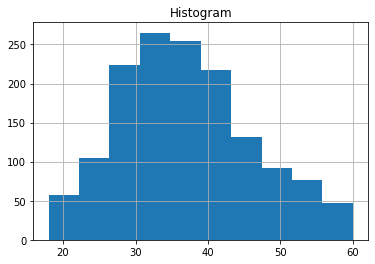

In [7]:
hr['Age'].hist(grid=True)
plt.title("Histogram")
plt.show()

Here we can analyse how age of employees are distributed. We can see that average age of employee is 36 years.

Gender : Analayse how gender is responsible for attrition rate.

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
le=LabelEncoder()
for column in hr.columns:
    hr[column]=le.fit_transform(hr[column])
    


In [10]:
hr['Attrition'] = le.fit_transform(hr['Attrition'])

In [11]:
hr['BusinessTravel'] = le.fit_transform(hr['BusinessTravel'])

In [12]:
hr['Department'] = le.fit_transform(hr['Department'])

In [13]:
hr['EducationField'] = le.fit_transform(hr['EducationField'])

In [14]:
hr['JobRole'] = le.fit_transform(hr['JobRole']) 

In [15]:
hr['MaritalStatus'] = le.fit_transform(hr['MaritalStatus'])

In [16]:
hr['Gender']

0       0
1       1
2       1
3       0
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: Gender, Length: 1470, dtype: int32

In [17]:
hr['BusinessTravel']

0       2
1       1
2       2
3       1
4       2
       ..
1465    1
1466    2
1467    2
1468    1
1469    2
Name: BusinessTravel, Length: 1470, dtype: int64

In [18]:
hr.groupby('Gender').Attrition.mean()

Gender
0    0.147959
1    0.170068
Name: Attrition, dtype: float64

Observartion: Males have little higher attrition rate than females.

Business Travel: Analysing how business travel is related to attrition.

In [19]:
hr.groupby('BusinessTravel')['Attrition'].mean()

BusinessTravel
0    0.080000
1    0.249097
2    0.149569
Name: Attrition, dtype: float64

<AxesSubplot:xlabel='BusinessTravel', ylabel='Attrition'>

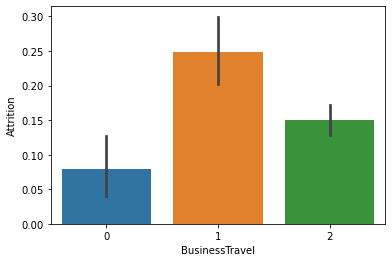

In [20]:
sns.barplot(x='BusinessTravel',y='Attrition',data=hr)

observation: The type of travel is highly varying thus can't make sure that travel is reason for highest attrition.Employees with frequently travel have highest attrition rate.

Department: Analysis on department how it can be relatable to attrition.

In [21]:
hr.groupby('Department')['Attrition'].mean()

Department
0    0.190476
1    0.138398
2    0.206278
Name: Attrition, dtype: float64

<AxesSubplot:xlabel='Department', ylabel='Attrition'>

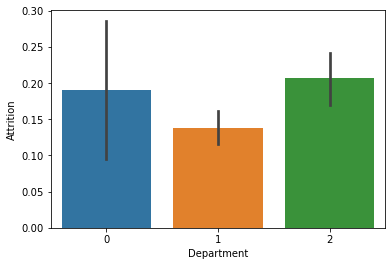

In [22]:
sns.barplot(x='Department',y='Attrition',data=hr)

Observation: Here we can observe that employees in R&D departmenr have very low attrition rate than employees in sales and HR department.

Education

<AxesSubplot:xlabel='Education', ylabel='Attrition'>

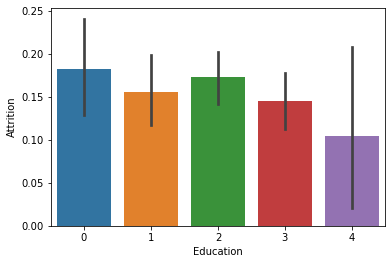

In [23]:
sns.barplot(x='Education',y='Attrition',data=hr)

<AxesSubplot:xlabel='EducationField', ylabel='Attrition'>

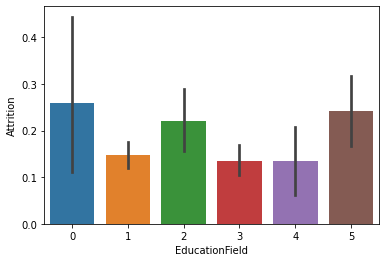

In [24]:
sns.barplot(x='EducationField',y='Attrition',data=hr)

Observation: Business and technical employees have higher attrition rate than other education fields.

<AxesSubplot:xlabel='JobInvolvement', ylabel='Attrition'>

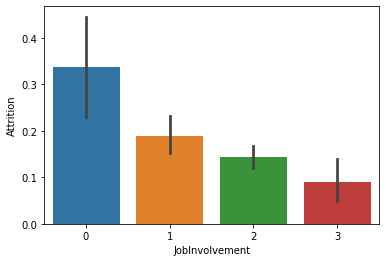

In [25]:
sns.barplot(x='JobInvolvement',y='Attrition',data=hr)

<AxesSubplot:xlabel='JobSatisfaction', ylabel='Attrition'>

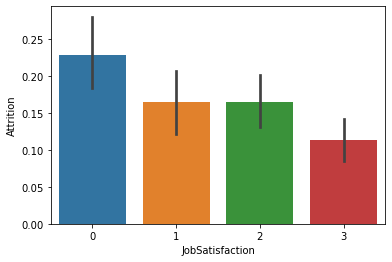

In [26]:
sns.barplot(x='JobSatisfaction',y='Attrition',data=hr)

Observation: Employees with higher job dissatisfaction are having poor work life balance thus they have higher attrition rate.

Distance from Home

In [27]:
hr.groupby(['JobRole','Attrition']).DistanceFromHome.mean().unstack()

Attrition,0,1
JobRole,,
0,8.204918,16.666667
1,5.600000,12.416667
2,8.329949,8.661290
3,6.927835,9.000000
4,8.533333,7.800000
5,7.474359,6.000000
6,7.869388,8.765957
7,8.026022,11.649123
8,8.000000,7.151515


Employees working in sales, medical, Laboratory, Manufacturing having higher attrition rate than employes who are working from home.

Monthly Income & Attrition

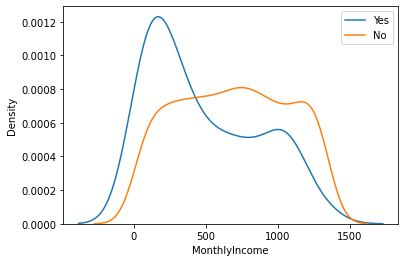

In [28]:
Attrition_Y = hr[hr['Attrition']==True]
Attrition_N = hr[hr['Attrition']==False]
sns.kdeplot(Attrition_Y.MonthlyIncome)
sns.kdeplot(Attrition_N.MonthlyIncome)
plt.legend(('Yes', 'No'))

<AxesSubplot:xlabel='JobRole', ylabel='MonthlyIncome'>

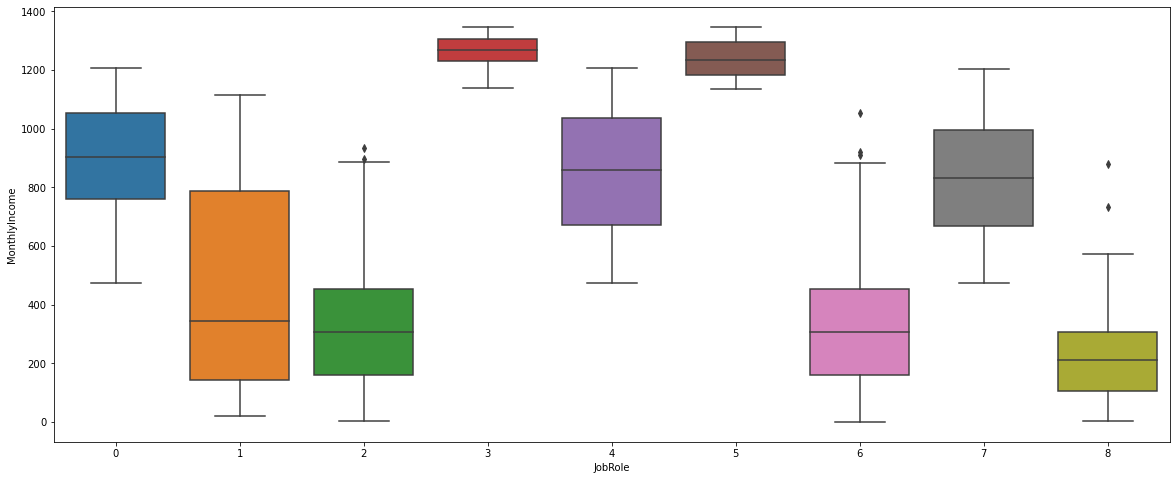

In [29]:
plt.figure(figsize=(20,8))
sns.boxplot(x='JobRole', y='MonthlyIncome',data = hr)

Observation: We can mention that employees with higher monthly rate have less attrition rate than employees with less momthly rate.

# Checking Correlation

In [30]:
hr.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010557,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010349,...,0.053535,NaN,0.037510,0.680409,-0.019621,-0.021490,0.309796,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056605,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010369,...,-0.045872,NaN,-0.137145,-0.171571,-0.059478,-0.063939,-0.136932,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004103,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015810,...,-0.035986,NaN,-0.016727,0.034144,0.015240,-0.011256,-0.014720,-0.011497,-0.032591,-0.022636
DailyRate,0.010557,-0.056605,-0.004103,1.000000,0.007796,-0.004738,-0.016550,0.038129,NaN,-0.051861,...,0.008530,NaN,0.041786,0.014877,0.002227,-0.037791,-0.032461,0.010997,-0.033431,-0.025849
Department,-0.031882,0.063991,-0.009044,0.007796,1.000000,0.017225,0.007996,0.013720,NaN,-0.010365,...,-0.022414,NaN,-0.012193,-0.015685,0.036875,0.026383,0.023308,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004738,0.017225,1.000000,0.021042,0.002013,NaN,0.032928,...,0.006557,NaN,0.044872,0.004560,-0.036942,-0.026556,0.009038,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016550,0.007996,0.021042,1.000000,-0.039592,NaN,0.041901,...,-0.009118,NaN,0.018422,0.148188,-0.025100,0.009819,0.067737,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.038129,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002457,...,-0.004378,NaN,-0.016185,-0.027833,0.049195,0.041191,-0.018987,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010349,-0.010369,-0.015810,-0.051861,-0.010365,0.032928,0.041901,-0.002457,NaN,1.000000,...,-0.069654,NaN,0.062452,-0.013950,0.023907,0.010740,-0.010528,-0.008853,-0.009151,-0.009432


<AxesSubplot:>

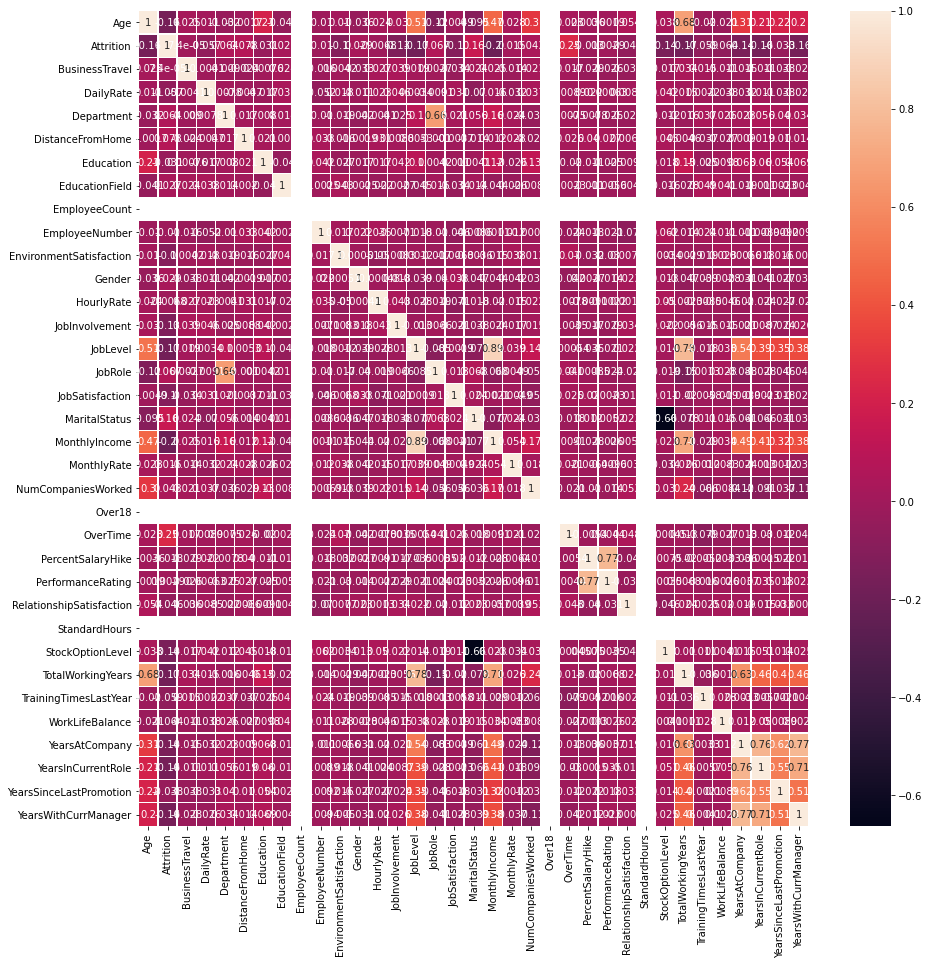

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(hr.corr(),annot=True,linewidths=0.2)

From above heatmap graph we can conclude that Features like totalworkingyears, job level, mOnthltincome, Yearsat company, Yearsincurrentrole, yearswithcurrentmanager showing highly
corelated to each other.

# Spilitting in X and Y

In [32]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [33]:
hr_features=['Age','BusinessTravel','DailyRate','Department','DistanceFromHome','Education','EducationField','EmployeeCount','EmployeeNumber',
             'EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus',
        'MonthlyIncome','MonthlyRate','NumCompaniesWorked','Over18','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction',
             'StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole',
             'YearsSinceLastPromotion','YearsWithCurrManager']


In [34]:
x=hr[hr_features]
y=hr.Attrition

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Model Testing

Random Forest Classifier

In [36]:
rfc=RandomForestClassifier()

In [39]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [40]:
print("HR Features sorted according to their scores: ")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), hr_features), reverse=True))

HR Features sorted according to their scores: 
[(0.0745, 'MonthlyIncome'), (0.0587, 'Age'), (0.0553, 'EmployeeNumber'), (0.0552, 'DailyRate'), (0.0494, 'OverTime'), (0.0492, 'DistanceFromHome'), (0.0485, 'TotalWorkingYears'), (0.047, 'HourlyRate'), (0.0467, 'MonthlyRate'), (0.0369, 'YearsAtCompany'), (0.0359, 'EnvironmentSatisfaction'), (0.0318, 'JobRole'), (0.0314, 'YearsWithCurrManager'), (0.0307, 'PercentSalaryHike'), (0.029, 'NumCompaniesWorked'), (0.028, 'JobInvolvement'), (0.0263, 'YearsSinceLastPromotion'), (0.0256, 'StockOptionLevel'), (0.0243, 'YearsInCurrentRole'), (0.0242, 'WorkLifeBalance'), (0.0238, 'TrainingTimesLastYear'), (0.0236, 'MaritalStatus'), (0.0231, 'EducationField'), (0.0213, 'Education'), (0.0211, 'JobSatisfaction'), (0.0203, 'RelationshipSatisfaction'), (0.0195, 'JobLevel'), (0.0126, 'Department'), (0.0114, 'BusinessTravel'), (0.0109, 'Gender'), (0.0037, 'PerformanceRating'), (0.0, 'StandardHours'), (0.0, 'Over18'), (0.0, 'EmployeeCount')]


In [42]:
y_pred=rfc.predict(x_test)

In [43]:
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.8458049886621315


In [ ]:
Conclusion: Thus we can conclude that features with accuracy above 50% for attrition rate are Monthly Income, Daily Rate, Age,Overtime, Distance from Home
    are highly responsible.Overall Employee attrition accuracy rate is above 80%.